Parashikimin e Sëmundjeve të Zemrës

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('heart.csv')
data.head(6).T

,0,1,2,3,4,5
Age,40,49,37,48,54,39
Sex,M,F,M,F,M,M
ChestPainType,ATA,NAP,ATA,ASY,NAP,NAP
RestingBP,140,160,130,138,150,120
Cholesterol,289,180,283,214,195,339
FastingBS,0,0,0,0,0,0
RestingECG,Normal,Normal,ST,Normal,Normal,Normal
MaxHR,172,156,98,108,122,170
ExerciseAngina,N,N,N,Y,N,N
Oldpeak,0.0,1.0,0.0,1.5,0.0,0.0


In [3]:
print("Llojet e tipeve të të dhënave që përmban dataset-i janë:\n", data.dtypes)


Llojet e tipeve të të dhënave që përmban dataset-i janë:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [4]:
kolona=data.shape[1]
rreshta=data.shape[0]
print(f"dataseti ka {kolona} kolona; dhe {rreshta} rreshta ")

dataseti ka 12 kolona; dhe 918 rreshta 


In [5]:
print("\nShpërndarja e sëmundjes së zemrës:")
print(data['HeartDisease'].value_counts())


Shpërndarja e sëmundjes së zemrës:
HeartDisease
1    508
0    410
Name: count, dtype: int64


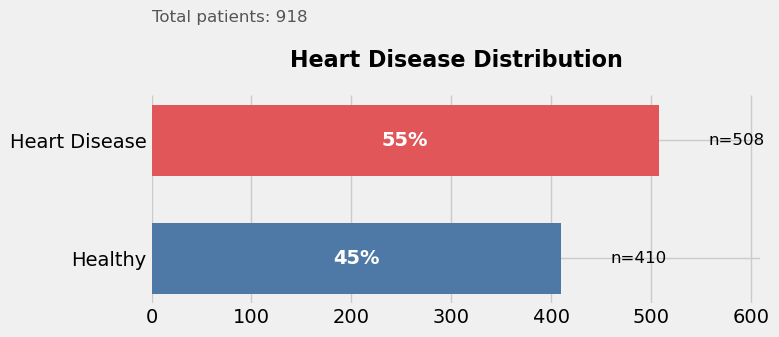

In [6]:
heart_disease_counts = data['HeartDisease'].value_counts()
total = len(data)
healthy_pct = round(heart_disease_counts[0]/total*100)
disease_pct = round(heart_disease_counts[1]/total*100)

plt.style.use('fivethirtyeight')  
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

colors = ['#4e79a7', '#e15759'] 

ax.barh(['Healthy'], heart_disease_counts[0], color=colors[0], height=0.6)
ax.barh(['Heart Disease'], heart_disease_counts[1], color=colors[1], height=0.6)

for s in ['top','right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

for i, (val, pct) in enumerate(zip([heart_disease_counts[0], heart_disease_counts[1]], [healthy_pct, disease_pct])):
    ax.text(val/2, i, f'{pct}%', 
            ha='center', va='center',
            color='white', fontsize=14, fontweight='bold')

for i, val in enumerate([heart_disease_counts[0], heart_disease_counts[1]]):
    ax.text(val+50, i, f'n={val}', 
            va='center', fontsize=12)


plt.title('Heart Disease Distribution', pad=20, fontsize=16, fontweight='bold')
plt.text(0, 2, f'Total patients: {total}',
        fontsize=12, color='#555555')

plt.xlim(0, max(heart_disease_counts.max()*1.2, total/2))
plt.tight_layout()
plt.show()

In [7]:
print("\nStatistikat përshkruese:")
round (data.describe(exclude = 'object'), 2)


Statistikat përshkruese:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


In [8]:
round (data.describe(exclude = ['float', 'int64']),2)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


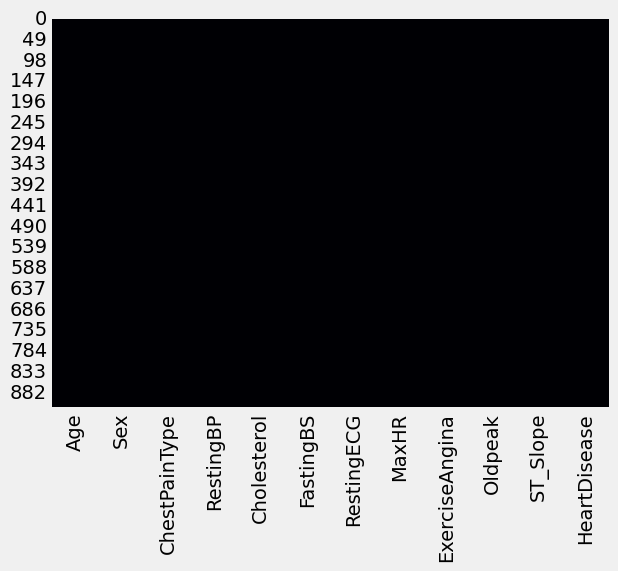

In [9]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [11]:
print("\nVlerat e zbrazëta:")
print(data.isnull().sum())


Vlerat e zbrazëta:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


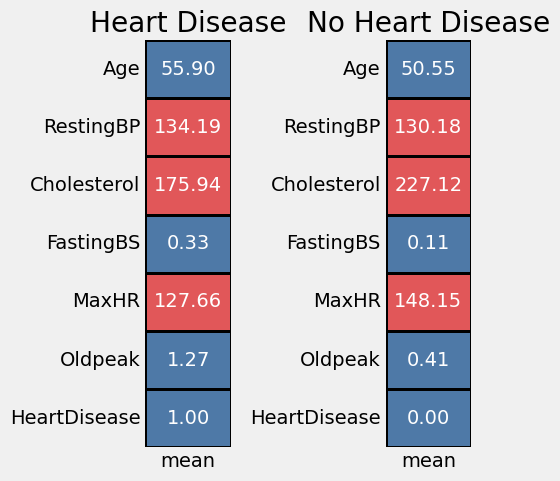

In [12]:
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#4e79a7','#e15759']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 1.0,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 1.0,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 1)

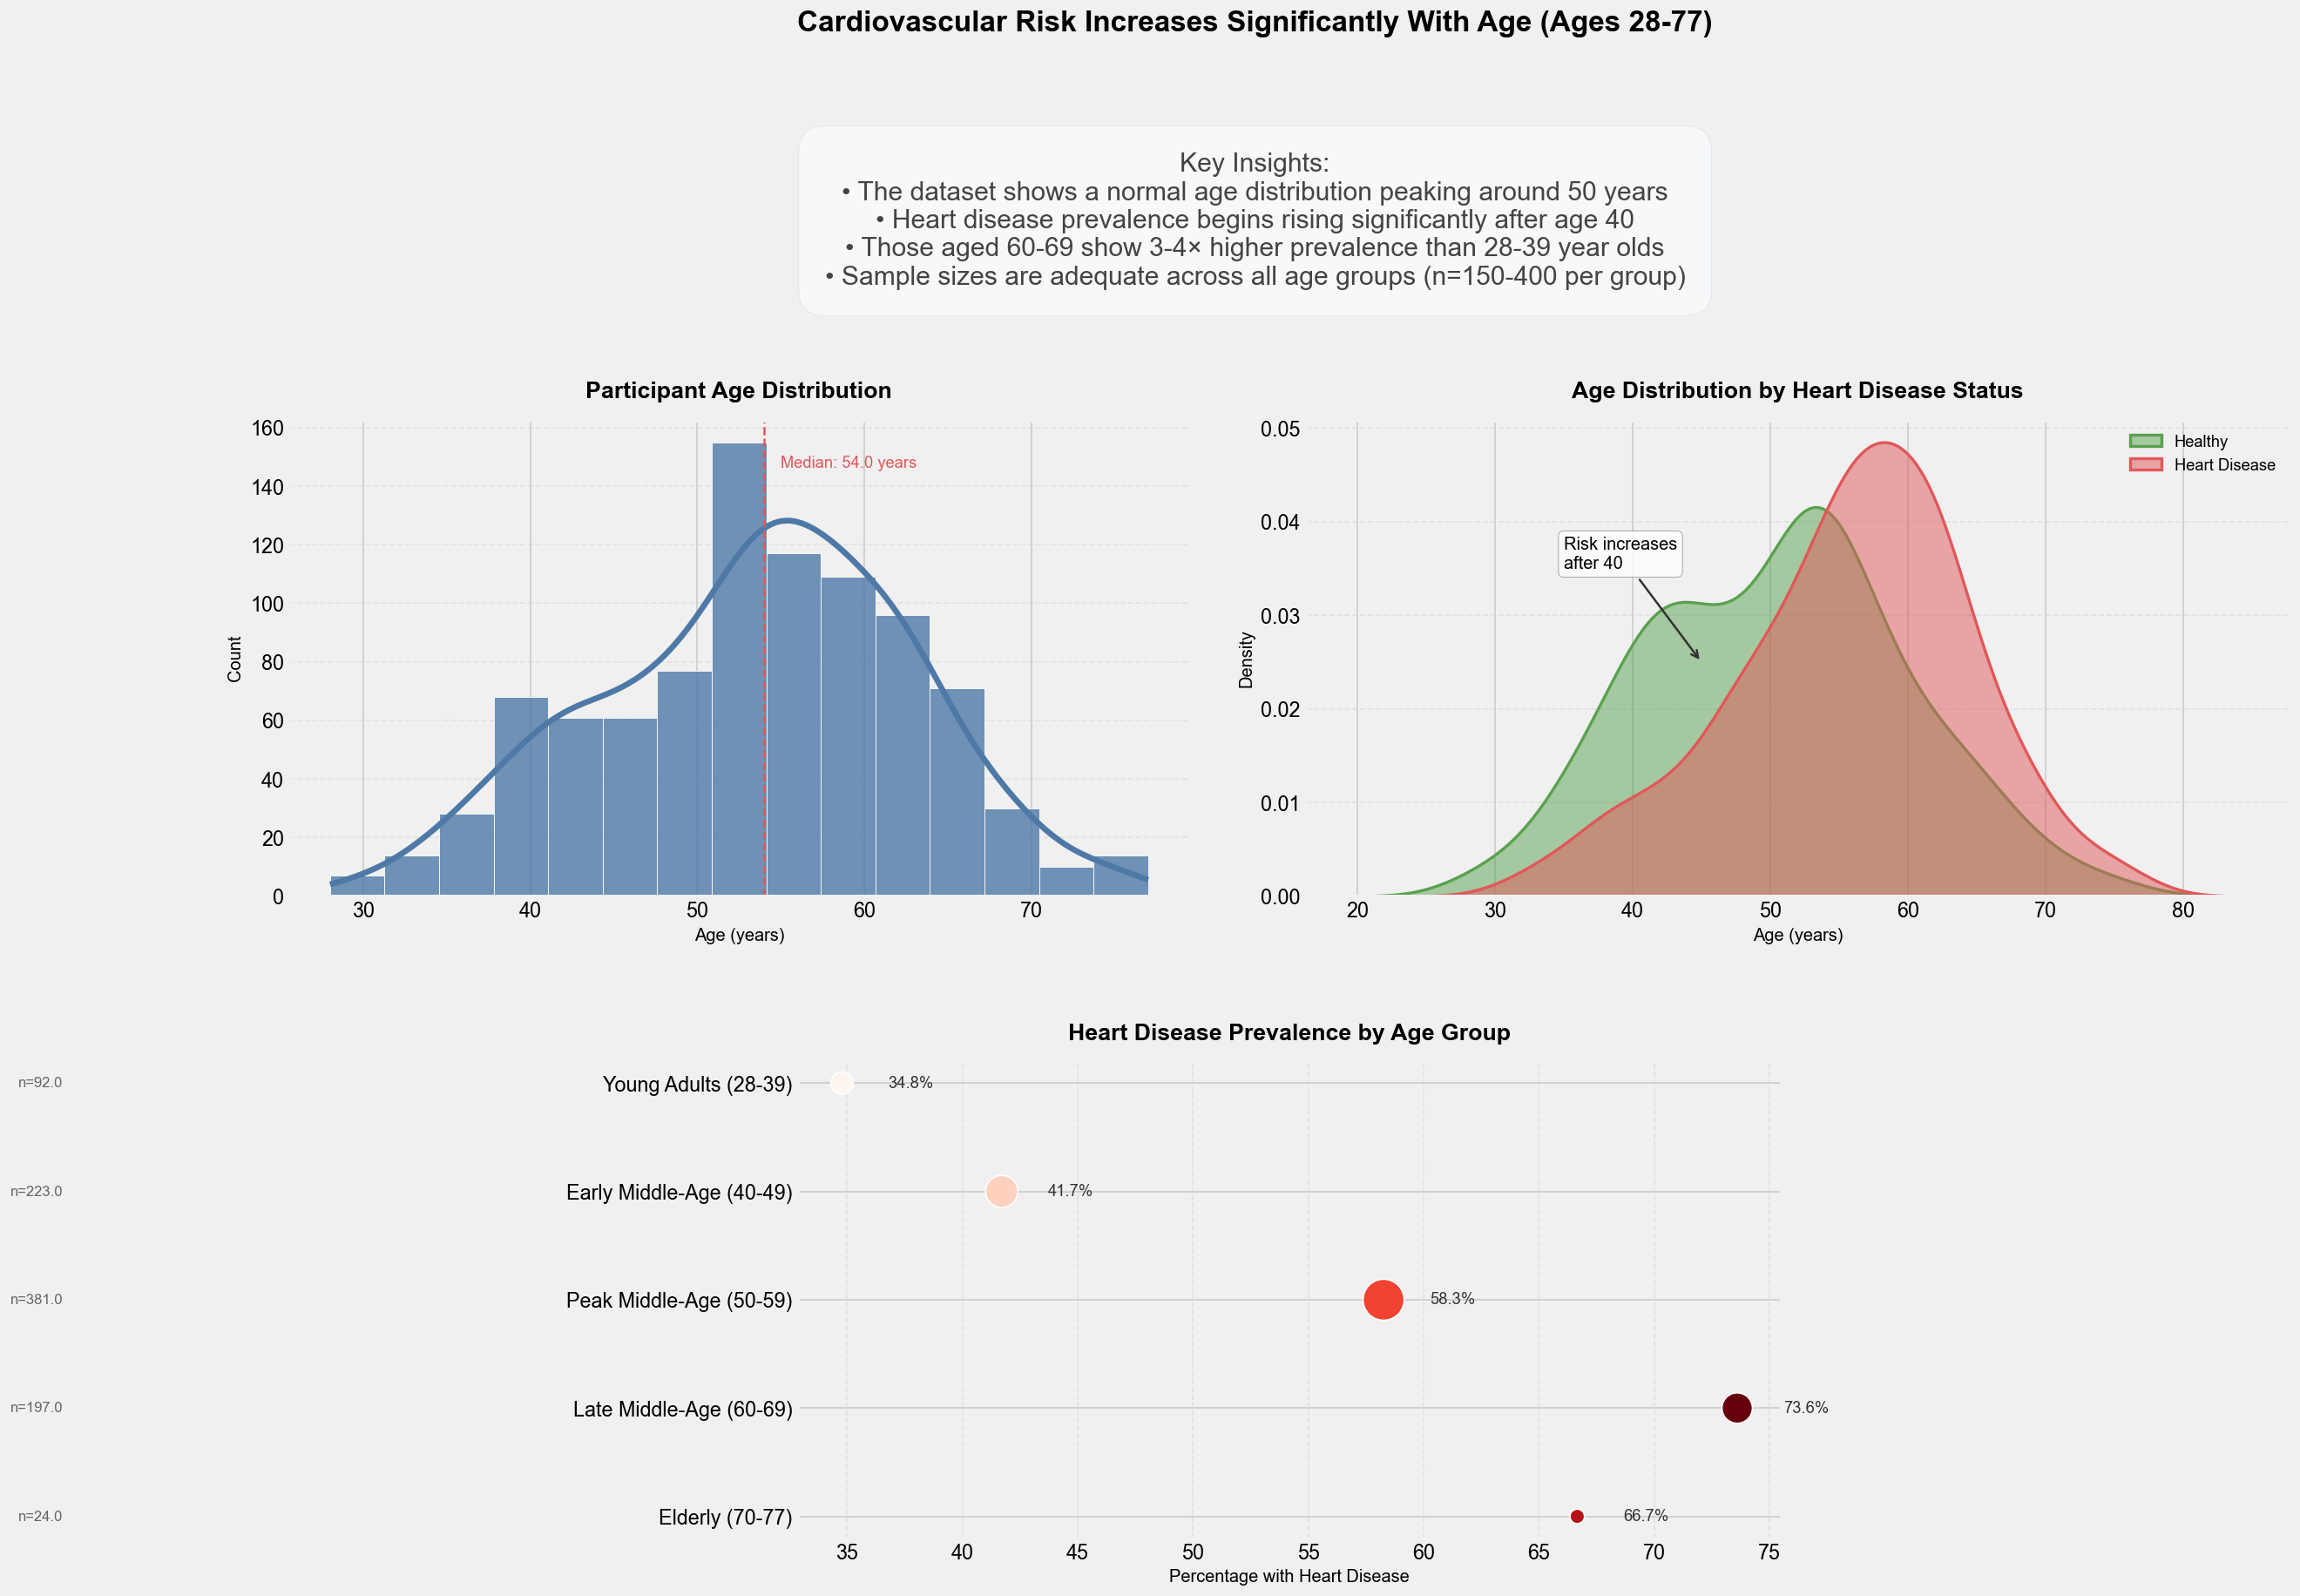

In [13]:
sns.set_palette("husl")
plt.rcParams['font.family'] = 'Arial'

data['Age_cat'] = pd.cut(data['Age'], bins=[28, 40, 50, 60, 70, 77],
                        labels=['Young Adults (28-39)', 'Early Middle-Age (40-49)',
                               'Peak Middle-Age (50-59)', 'Late Middle-Age (60-69)',
                               'Elderly (70-77)'])

fig = plt.figure(figsize=(22, 17), dpi=120)
gs = fig.add_gridspec(14, 24)
gs.update(wspace=0.6, hspace=1.2)


fig.suptitle('Cardiovascular Risk Increases Significantly With Age (Ages 28-77)',
             fontsize=20, weight='bold', y=0.98, x=0.5)

insight_text = ("Key Insights:\n"
                "• The dataset shows a normal age distribution peaking around 50 years\n"
                "• Heart disease prevalence begins rising significantly after age 40\n"
                "• Those aged 60-69 show 3-4× higher prevalence than 28-39 year olds\n"
                "• Sample sizes are adequate across all age groups (n=150-400 per group)")

fig.text(0.5, 0.91, insight_text, ha='center', va='top', fontsize=18,
         bbox=dict(facecolor='#f8f9fa', edgecolor='#dee2e6', boxstyle='round,pad=1', alpha=0.95),
         color='#444444')

fig.suptitle('Cardiovascular Risk Increases Significantly With Age (Ages 28-77)',
             fontsize=20, weight='bold', y=0.99, x=0.5)


ax1 = fig.add_subplot(gs[2:7, :11])   
ax2 = fig.add_subplot(gs[2:7, 12:])   
ax3 = fig.add_subplot(gs[8:13, 6:18]) 


sns.histplot(data=data, x='Age', bins=15, kde=True, ax=ax1,
             color='#4e79a7', edgecolor='white', linewidth=0.5, alpha=0.8)
ax1.set_title('Participant Age Distribution', fontsize=16, pad=15, weight='bold')
ax1.set_xlabel('Age (years)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.4)


median_age = data['Age'].median()
ax1.axvline(median_age, color='#e15759', linestyle='--', linewidth=1.5)
ax1.text(median_age+1, ax1.get_ylim()[1]*0.9, f'Median: {median_age} years',
         fontsize=11, color='#e15759')

sns.kdeplot(data=data[data['HeartDisease']==0], x='Age', ax=ax2,
            fill=True, color='#59a14f', alpha=0.5, label='Healthy', linewidth=2)
sns.kdeplot(data=data[data['HeartDisease']==1], x='Age', ax=ax2,
            fill=True, color='#e15759', alpha=0.5, label='Heart Disease', linewidth=2)
ax2.set_title('Age Distribution by Heart Disease Status', fontsize=16, pad=15, weight='bold')
ax2.set_xlabel('Age (years)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.legend(frameon=False, fontsize=11)
ax2.grid(axis='y', linestyle='--', alpha=0.4)


ax2.annotate('Risk increases\nafter 40', xy=(45, 0.025), xytext=(35, 0.035),
             arrowprops=dict(arrowstyle='->', color='#333333', lw=1.5),
             fontsize=12, bbox=dict(boxstyle='round', fc='white', ec='gray', alpha=0.8))


age_counts = data.groupby(['Age_cat', 'HeartDisease']).size().unstack()
age_counts['Total'] = age_counts.sum(axis=1)
age_counts['Disease_Pct'] = (age_counts[1] / age_counts['Total']) * 100


sns.scatterplot(x='Disease_Pct', y=age_counts.index, data=age_counts,
                size='Total', sizes=(100, 800), hue='Disease_Pct',
                palette='Reds', ax=ax3, legend=False)
ax3.set_title('Heart Disease Prevalence by Age Group', fontsize=16, pad=15, weight='bold')
ax3.set_xlabel('Percentage with Heart Disease', fontsize=12)
ax3.set_ylabel('', fontsize=12)
ax3.grid(axis='x', linestyle='--', alpha=0.4)


for i, (idx, row) in enumerate(age_counts.iterrows()):
    ax3.text(row['Disease_Pct']+2, i, f"{row['Disease_Pct']:.1f}%",
             va='center', fontsize=11, color='#333333')


for i, (idx, row) in enumerate(age_counts.iterrows()):
    ax3.text(1, i, f"n={row['Total']}", va='center', fontsize=10,
             color='#666666', ha='right')

plt.tight_layout(rect=[0, 0, 0, 0.86])  
plt.show()

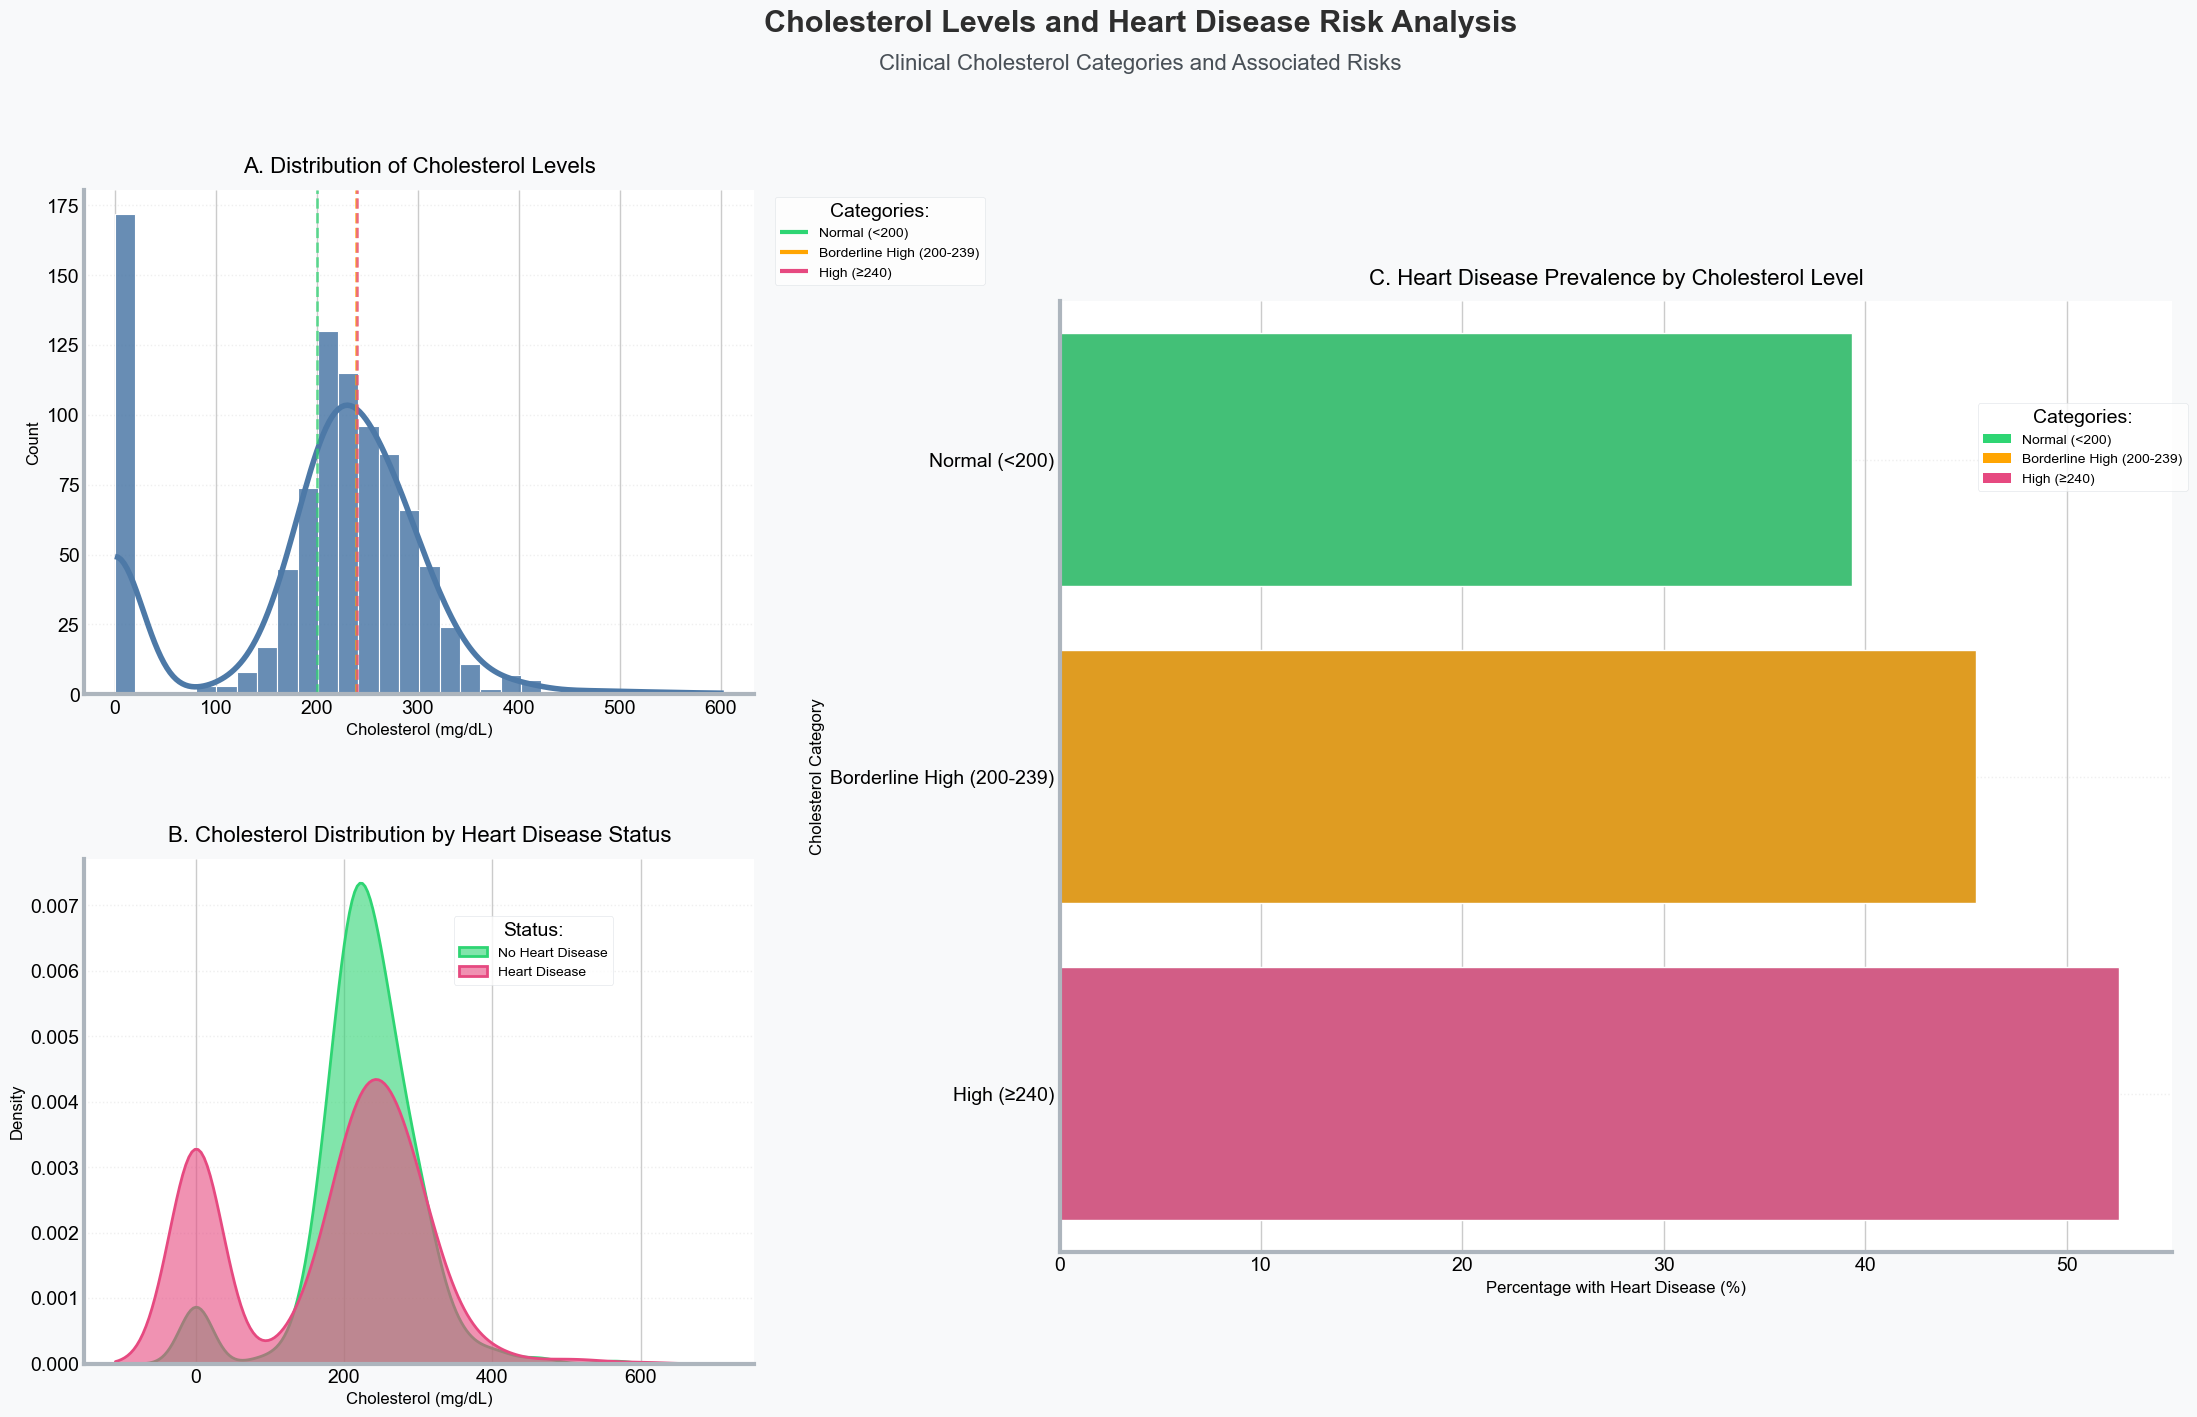

In [22]:

data['Cholesterol_cat'] = pd.cut(data['Cholesterol'], 
                                  bins=[0, 200, 239, 1000],
                                  labels=['Normal (<200)', 
                                          'Borderline High (200-239)', 
                                          'High (≥240)'])

fig = plt.figure(figsize=(24, 20), dpi=100, facecolor='#f8f9fa')  
gs = fig.add_gridspec(15, 24)  
gs.update(wspace=0.8, hspace=0.9)

fig.suptitle('Cholesterol Levels and Heart Disease Risk Analysis', 
            fontsize=22, weight='bold', y=0.97, x=0.52,
            color='#2e2e2e')
fig.text(0.52, 0.94, 'Clinical Cholesterol Categories and Associated Risks', 
        fontsize=16, color='#495057', ha='center')

ax1 = fig.add_subplot(gs[0:5, :8])    
ax2 = fig.add_subplot(gs[6:11, :8])   
ax3 = fig.add_subplot(gs[1:10, 11:])  


sns.histplot(data=data, x='Cholesterol', bins=30, kde=True, ax=ax1,
            color='#4d79a7', edgecolor='white', linewidth=0.8,
            alpha=0.85)
ax1.set_title('A. Distribution of Cholesterol Levels', fontsize=16, pad=12)
ax1.set_xlabel('Cholesterol (mg/dL)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)


thresholds = [
    (200, '#2ed573', 'Normal (<200)'),
    (239, '#ffa502', 'Borderline High (200-239)'),
    (240, '#e64980', 'High (≥240)')
]

for val, color, label in thresholds:
    ax1.axvline(val, color=color, linestyle='--', linewidth=2, alpha=0.7)


sns.kdeplot(data=data[data['HeartDisease']==0], x='Cholesterol', ax=ax2,
           fill=True, color='#2ed573', alpha=0.6, label='No Heart Disease',
           linewidth=2)
sns.kdeplot(data=data[data['HeartDisease']==1], x='Cholesterol', ax=ax2,
           fill=True, color='#e64980', alpha=0.6, label='Heart Disease',
           linewidth=2)

ax2.set_title('B. Cholesterol Distribution by Heart Disease Status', 
             fontsize=16, pad=12)
ax2.set_xlabel('Cholesterol (mg/dL)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)


chol_counts = data.groupby(['Cholesterol_cat', 'HeartDisease']).size().unstack()
chol_counts['Total'] = chol_counts.sum(axis=1)
chol_counts['Disease_Pct'] = (chol_counts[1] / chol_counts['Total']) * 100

colors = ['#2ed573', '#ffa502', '#e64980']
sns.barplot(x='Disease_Pct', y=chol_counts.index, data=chol_counts,
           palette=colors, ax=ax3, edgecolor='white', linewidth=1)

ax3.set_title('C. Heart Disease Prevalence by Cholesterol Level', 
             fontsize=16, pad=12)
ax3.set_xlabel('Percentage with Heart Disease (%)', fontsize=12)
ax3.set_ylabel('Cholesterol Category', fontsize=12)


threshold_legend = [plt.Line2D([0], [0], color=color, lw=3, label=label) 
                   for val, color, label in thresholds]
ax1.legend(handles=threshold_legend, frameon=True, facecolor='white',
          edgecolor='#dee2e6', fontsize=10, title='Categories:',
          bbox_to_anchor=(1.02, 1), loc='upper left')


ax2.legend(frameon=True, facecolor='white', edgecolor='#dee2e6',
          fontsize=10, title='Status:', bbox_to_anchor=(0.8, 0.9))


category_patches = [plt.Rectangle((0, 0), 1, 1, fc=color) for color in colors]


ax3.legend(handles=category_patches, labels=chol_counts.index.tolist(),
           frameon=True, facecolor='white', edgecolor='#dee2e6',
           fontsize=10, title='Categories:', bbox_to_anchor=(1.02, 0.9))


for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('#ffffff')
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#adb5bd')
    ax.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


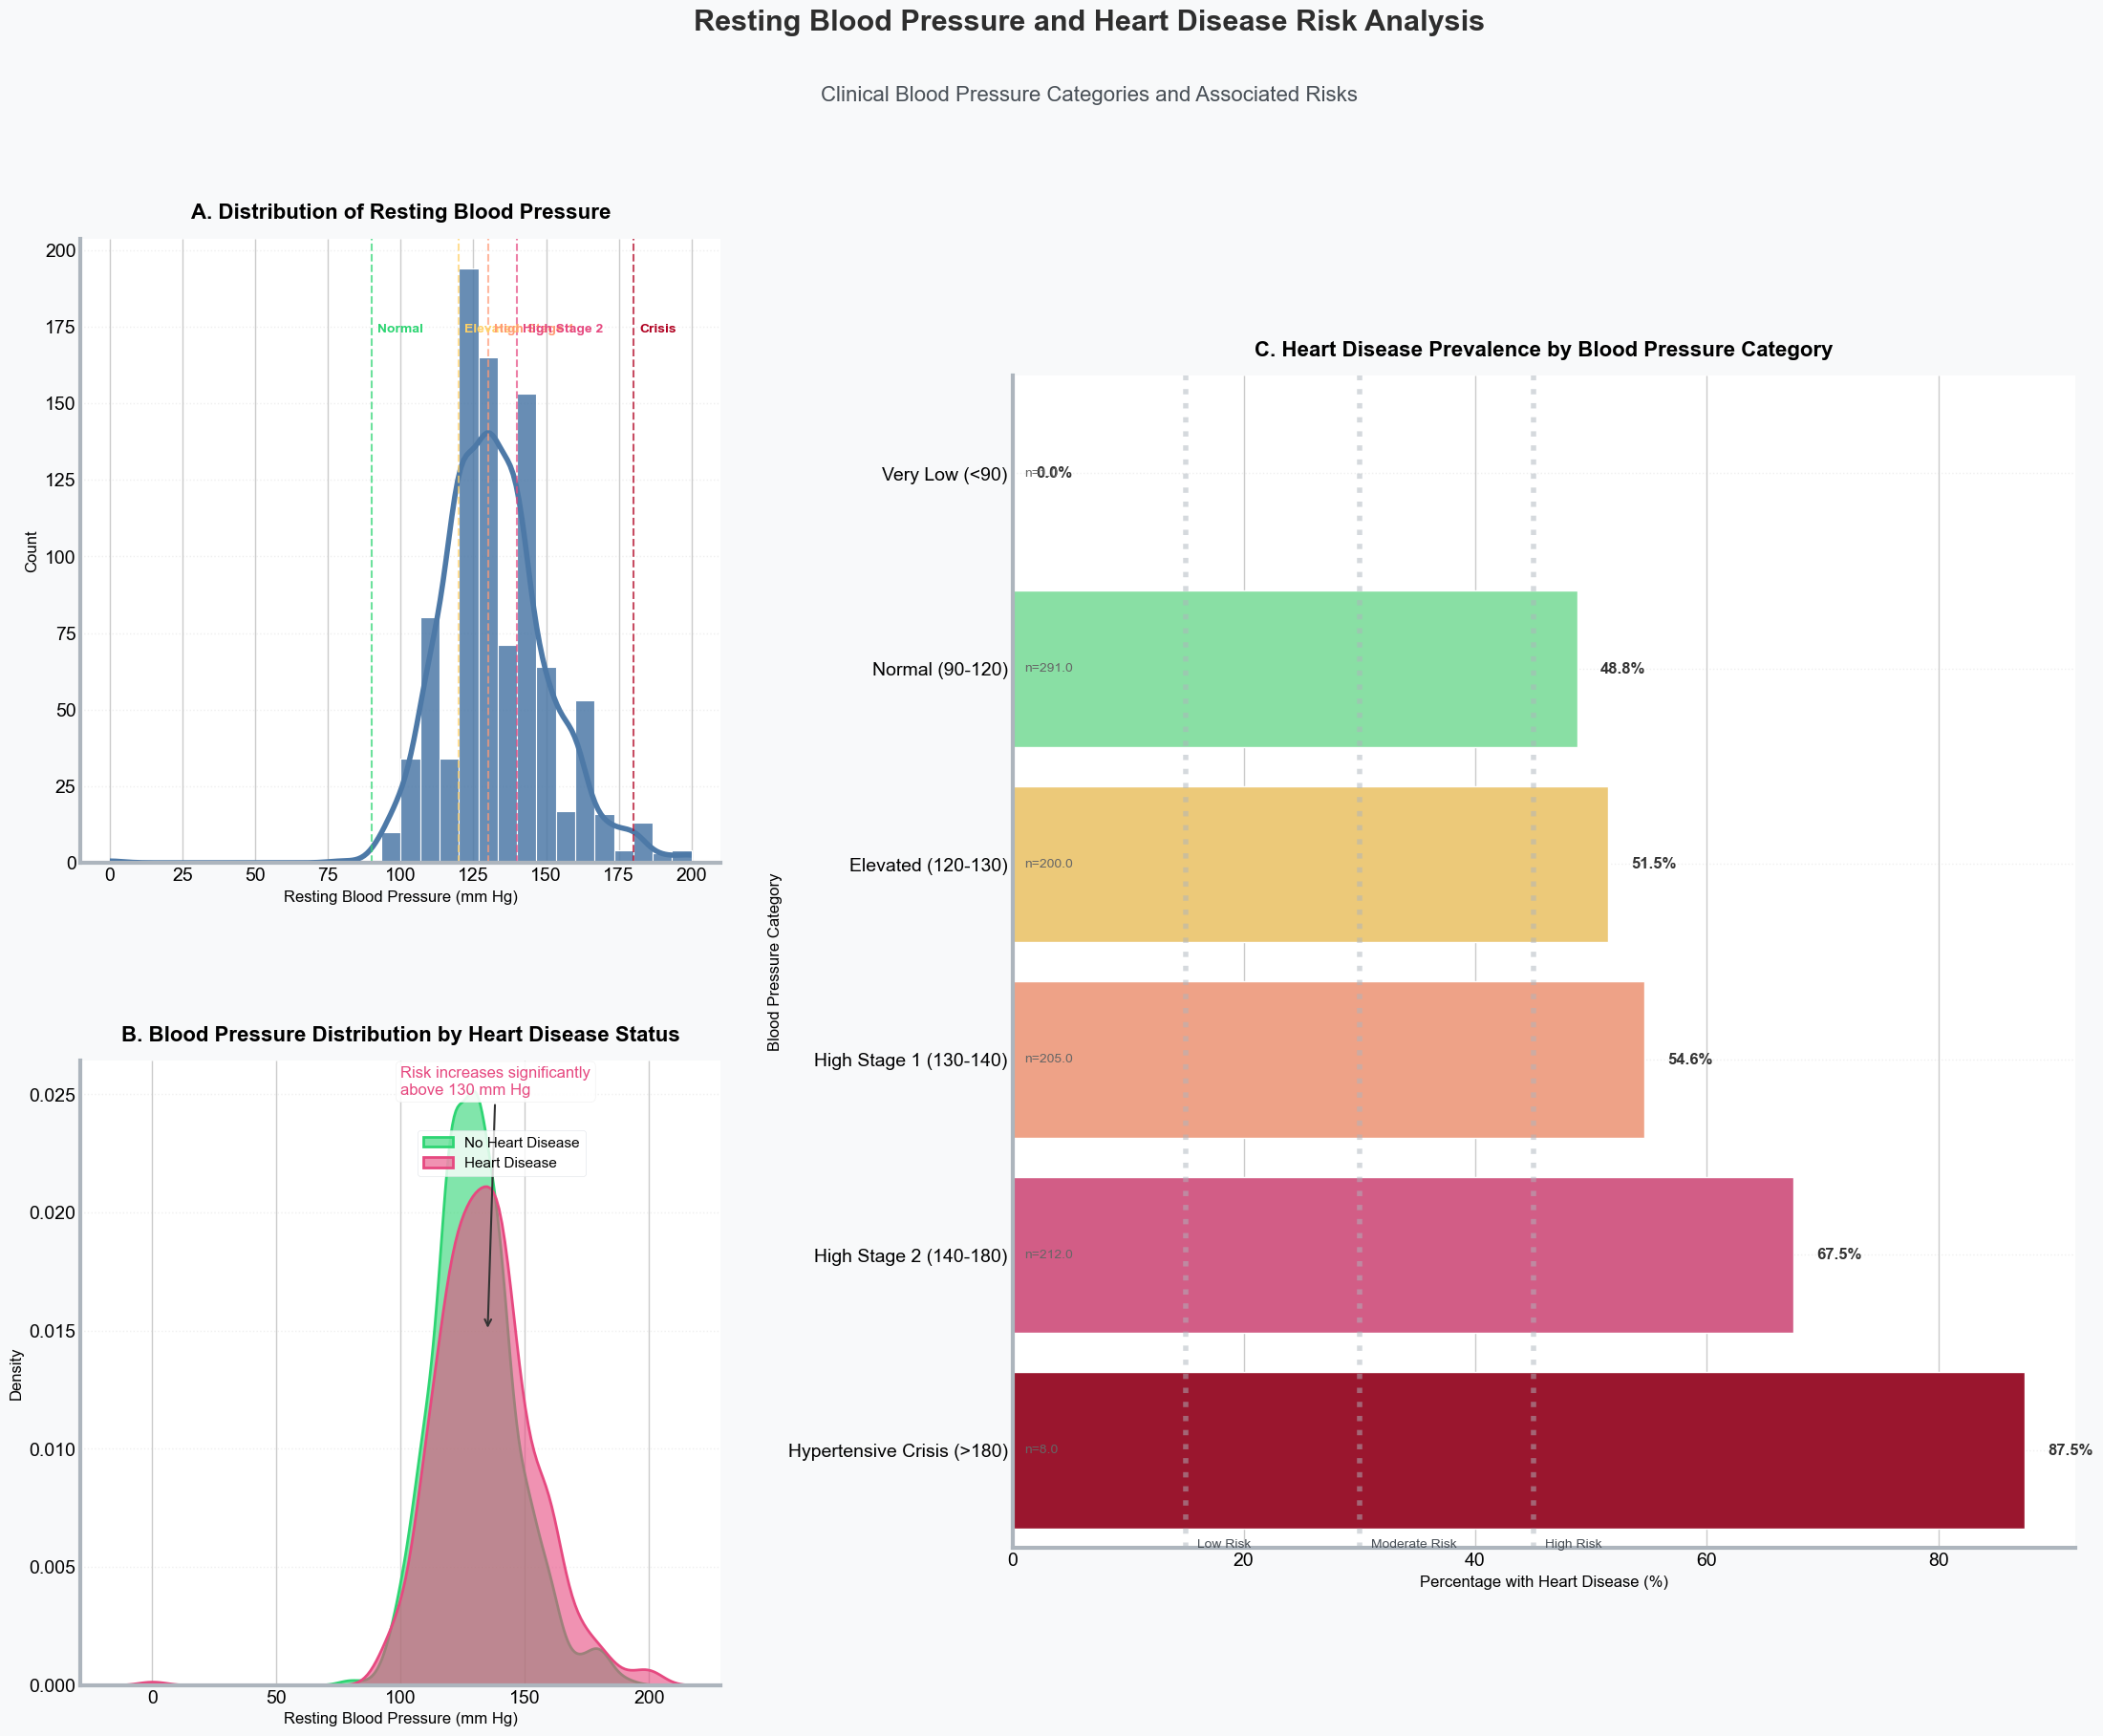

In [23]:
data['RestingBP_cat'] = pd.cut(data['RestingBP'], 
                              bins=[0, 90, 120, 130, 140, 180, 300],
                              labels=['Very Low (<90)', 
                                     'Normal (90-120)', 
                                     'Elevated (120-130)',
                                     'High Stage 1 (130-140)',
                                     'High Stage 2 (140-180)',
                                     'Hypertensive Crisis (>180)'])

fig = plt.figure(figsize=(24, 24), dpi=100, facecolor='#f8f9fa')
gs = fig.add_gridspec(14, 24)
gs.update(wspace=0.8, hspace=0.8)

fig.suptitle('Resting Blood Pressure and Heart Disease Risk Analysis', 
            fontsize=22, weight='bold', y=0.98, x=0.52,
            color='#2e2e2e')
fig.text(0.52, 0.94, 'Clinical Blood Pressure Categories and Associated Risks', 
        fontsize=16, color='#495057', ha='center')


ax1 = fig.add_subplot(gs[0:5, :8])    
ax2 = fig.add_subplot(gs[6:11, :8])   
ax3 = fig.add_subplot(gs[1:10, 11:])  

sns.histplot(data=data, x='RestingBP', bins=30, kde=True, ax=ax1,
            color='#4d79a7', edgecolor='white', linewidth=0.8,
            alpha=0.85)
ax1.set_title('A. Distribution of Resting Blood Pressure', fontsize=16, pad=15, weight='bold')
ax1.set_xlabel('Resting Blood Pressure (mm Hg)', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)

thresholds = [
    (90, '#2ed573', 'Normal'),
    (120, '#ffd166', 'Elevated'),
    (130, '#ff9a76', 'High Stage 1'), 
    (140, '#e64980', 'High Stage 2'),
    (180, '#b00020', 'Crisis')
]

for val, color, label in thresholds:
    ax1.axvline(val, color=color, linestyle='--', linewidth=1.5, alpha=0.7)
    ax1.text(val+2, ax1.get_ylim()[1]*0.85, label, 
            color=color, fontsize=10, weight='bold')


sns.kdeplot(data=data[data['HeartDisease']==0], x='RestingBP', ax=ax2,
           fill=True, color='#2ed573', alpha=0.6, label='No Heart Disease',
           linewidth=2)

sns.kdeplot(data=data[data['HeartDisease']==1], x='RestingBP', ax=ax2,
           fill=True, color='#e64980', alpha=0.6, label='Heart Disease',
           linewidth=2)

ax2.set_title('B. Blood Pressure Distribution by Heart Disease Status', 
             fontsize=16, pad=15, weight='bold')
ax2.set_xlabel('Resting Blood Pressure (mm Hg)', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)


ax2.legend(frameon=True, facecolor='white', edgecolor='#dee2e6',
          fontsize=11, bbox_to_anchor=(0.8, 0.9))


ax2.annotate('Risk increases significantly\nabove 130 mm Hg',
            xy=(135, 0.015), xytext=(100, 0.025),
            arrowprops=dict(arrowstyle='->', color='#333333', lw=1.5),
            fontsize=12, color='#e64980',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

bp_counts = data.groupby(['RestingBP_cat', 'HeartDisease']).size().unstack()
bp_counts['Total'] = bp_counts.sum(axis=1)
bp_counts['Disease_Pct'] = (bp_counts[1] / bp_counts['Total']) * 100

colors = ['#2ed573', '#7bed9f', '#ffd166', '#ff9a76', '#e64980', '#b00020']
sns.barplot(x='Disease_Pct', y=bp_counts.index, data=bp_counts,
           palette=colors, ax=ax3, edgecolor='white', linewidth=1)

ax3.set_title('C. Heart Disease Prevalence by Blood Pressure Category', 
             fontsize=16, pad=15, weight='bold')
ax3.set_xlabel('Percentage with Heart Disease (%)', fontsize=12)
ax3.set_ylabel('Blood Pressure Category', fontsize=12)


for i, (idx, row) in enumerate(bp_counts.iterrows()):
    ax3.text(row['Disease_Pct']+2, i, f"{row['Disease_Pct']:.1f}%",
            va='center', fontsize=12, color='#333333', weight='bold')
    ax3.text(1, i, f"n={row['Total']}", va='center', fontsize=10,
            color='#666666', ha='left')

for level, label in [(15, 'Low Risk'), (30, 'Moderate Risk'), (45, 'High Risk')]:
    ax3.axvline(level, color='#adb5bd', linestyle=':', alpha=0.5)
    ax3.text(level+1, 5.5, label, color='#495057', fontsize=10)


for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('#ffffff')
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#adb5bd')
    ax.grid(axis='y', linestyle=':', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

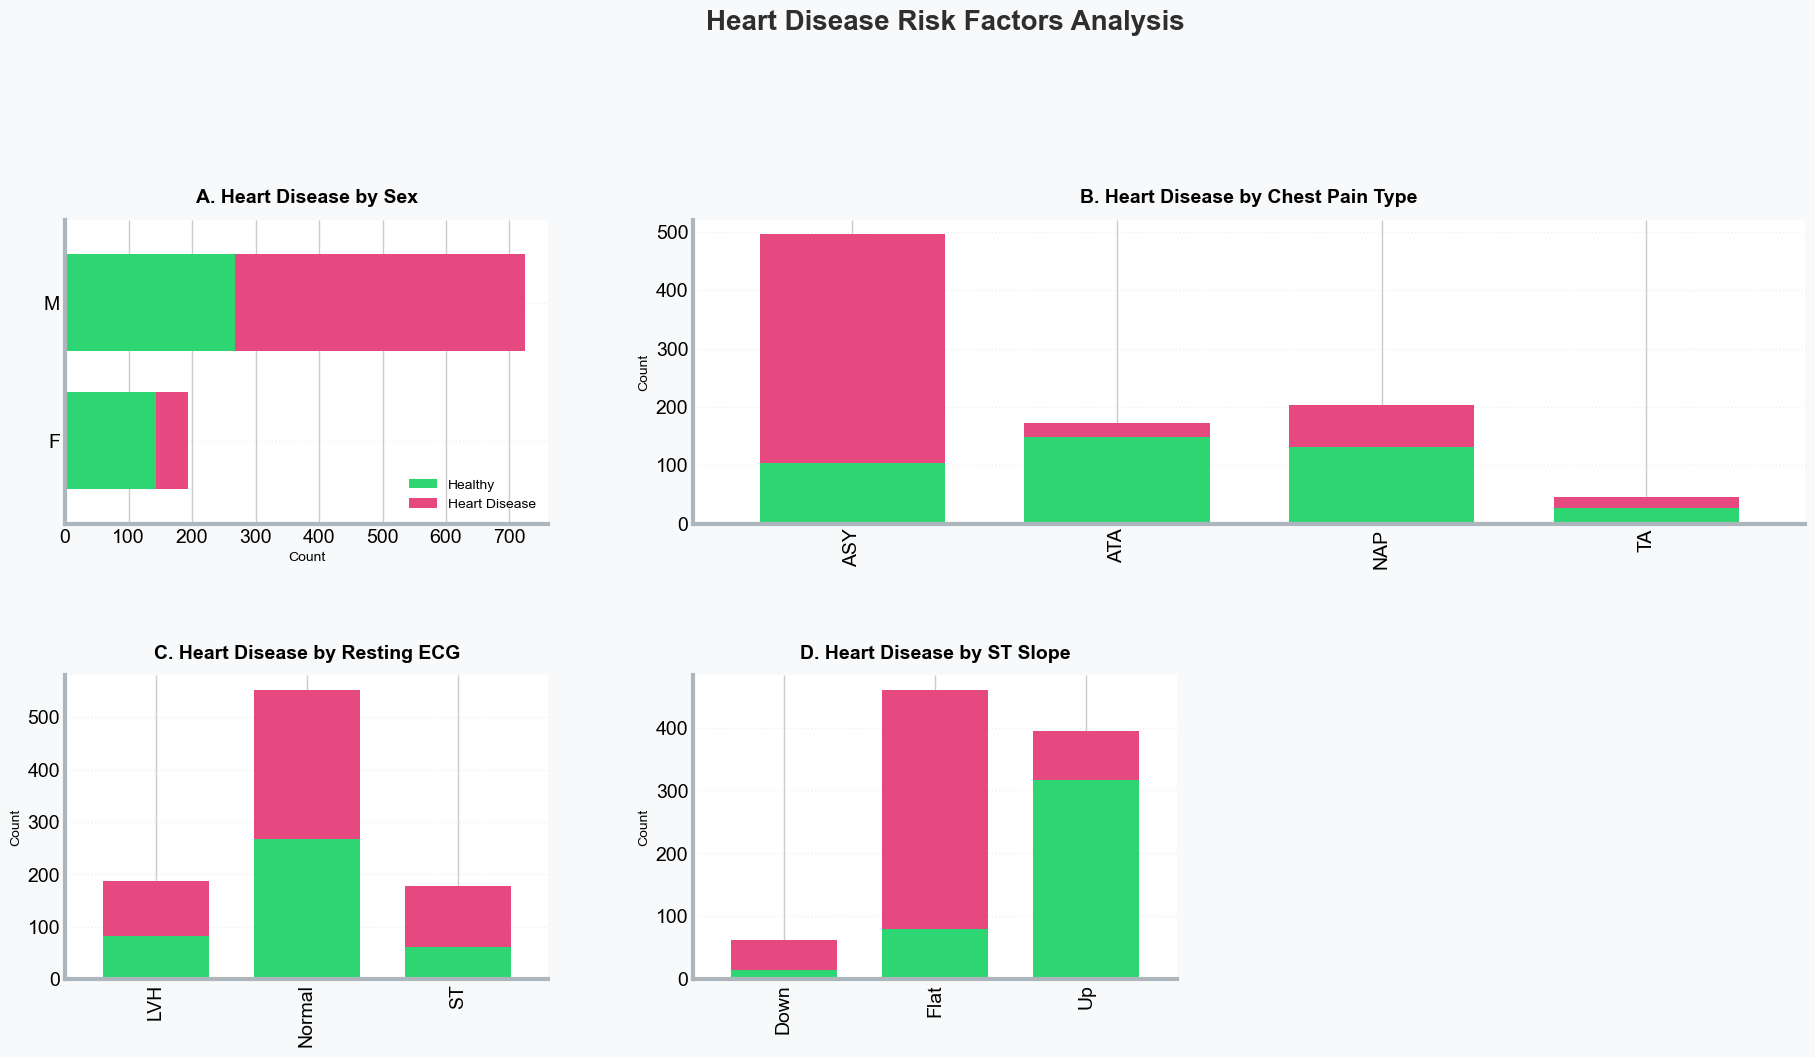

In [24]:
fig = plt.figure(figsize=(20, 15), dpi=100, facecolor='#f8f9fa')
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.3, hspace=0.5)

ax1 = fig.add_subplot(gs[0, 0])  
ax2 = fig.add_subplot(gs[0, 1:])  
ax3 = fig.add_subplot(gs[1, 0])  
ax4 = fig.add_subplot(gs[1, 1])  
ax5 = fig.add_subplot(gs[1, 2])  

axes = [ax1, ax2, ax3, ax4, ax5]

for ax in axes:
    ax.set_facecolor('#ffffff')
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color('#adb5bd')
    ax.grid(axis='y', linestyle=':', alpha=0.3)

healthy_col = '#2ed573'  
disease_col = '#e64980'  

sex_counts = data.groupby(['Sex', 'HeartDisease']).size().unstack()
sex_counts.plot(kind='barh', stacked=True, color=[healthy_col, disease_col], ax=ax1, width=0.7)
ax1.set_title('A. Heart Disease by Sex', fontsize=14, pad=12, weight='bold')
ax1.set_xlabel('Count', fontsize=10)
ax1.set_ylabel('')
ax1.legend(['Healthy', 'Heart Disease'], frameon=False, fontsize=10)


chest_counts = data.groupby(['ChestPainType', 'HeartDisease']).size().unstack()
chest_counts.plot(kind='bar', stacked=True, color=[healthy_col, disease_col], ax=ax2, width=0.7)
ax2.set_title('B. Heart Disease by Chest Pain Type', fontsize=14, pad=12, weight='bold')
ax2.set_ylabel('Count', fontsize=10)
ax2.set_xlabel('')
ax2.legend().set_visible(False)

ecg_counts = data.groupby(['RestingECG', 'HeartDisease']).size().unstack()
ecg_counts.plot(kind='bar', stacked=True, color=[healthy_col, disease_col], ax=ax3, width=0.7)
ax3.set_title('C. Heart Disease by Resting ECG', fontsize=14, pad=12, weight='bold')
ax3.set_ylabel('Count', fontsize=10)
ax3.set_xlabel('')
ax3.legend().set_visible(False)

st_counts = data.groupby(['ST_Slope', 'HeartDisease']).size().unstack()
st_counts.plot(kind='bar', stacked=True, color=[healthy_col, disease_col], ax=ax4, width=0.7)
ax4.set_title('D. Heart Disease by ST Slope', fontsize=14, pad=12, weight='bold')
ax4.set_ylabel('Count', fontsize=10)
ax4.set_xlabel('')
ax4.legend().set_visible(False)

ax5.axis('off')


fig.suptitle('Heart Disease Risk Factors Analysis', 
            fontsize=20, weight='bold', y=1.02, x=0.52,
            color='#2e2e2e')

plt.tight_layout()
plt.show()

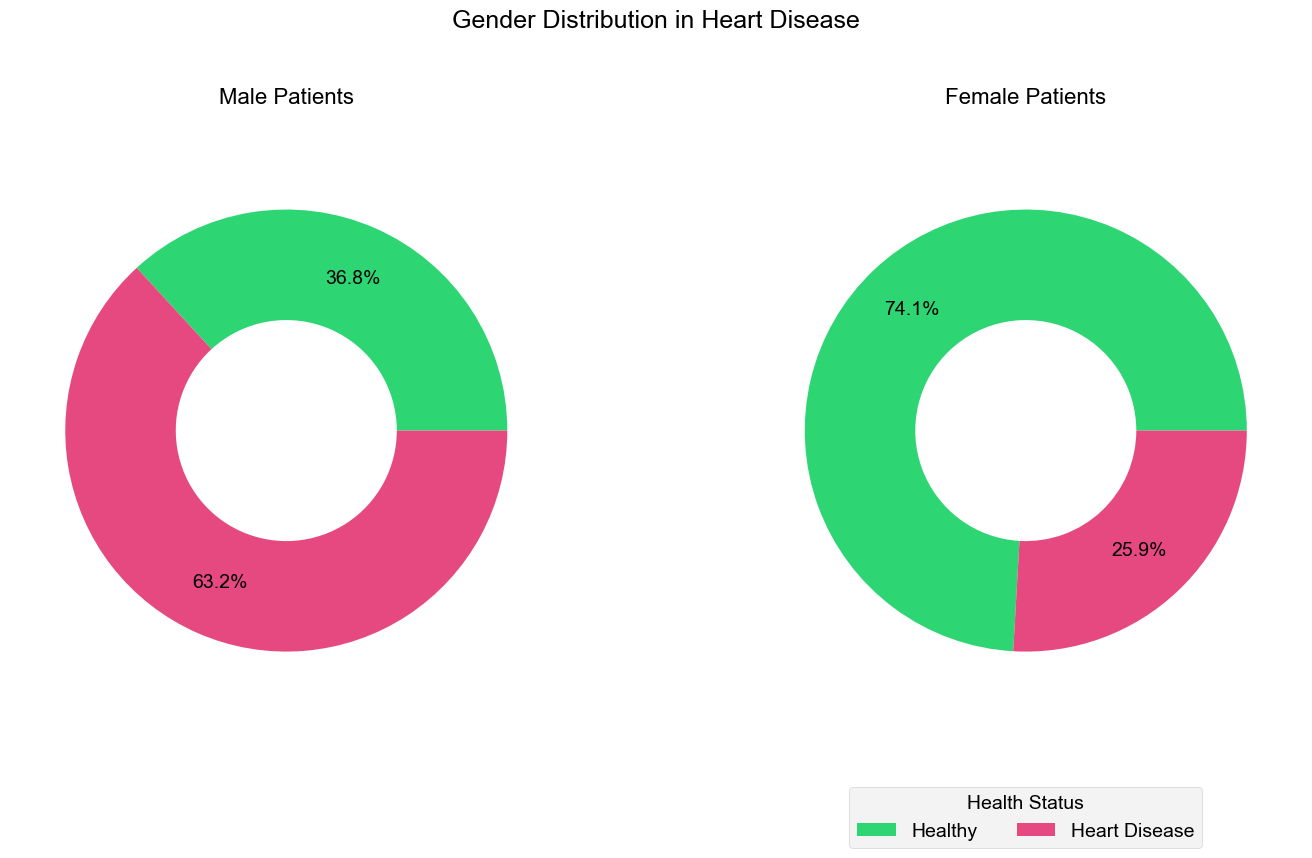

In [25]:
def create_gender_visualization(data):  
    fig = plt.figure(figsize=(15, 8), dpi=100, facecolor='white')
    
    gender_counts = data.groupby(['Sex', 'HeartDisease']).size().unstack()
    gender_totals = gender_counts.sum(axis=1)
    gender_pcts = gender_counts.div(gender_totals, axis=0) * 100
    
    ax1 = plt.subplot(121) 
    ax2 = plt.subplot(122)  
    
    colors = ['#2ed573', '#e64980'] 

    male_data = gender_pcts.loc['M']
    wedges1, _, auto1 = ax1.pie(male_data, colors=colors, autopct='%1.1f%%',
                              pctdistance=0.75, wedgeprops=dict(width=0.5))
    ax1.set_title('Male Patients\n', pad=20, fontsize=16)

    female_data = gender_pcts.loc['F']
    wedges2, _, auto2 = ax2.pie(female_data, colors=colors, autopct='%1.1f%%', 
                               pctdistance=0.75, wedgeprops=dict(width=0.5))
    ax2.set_title('Female Patients\n', pad=20, fontsize=16)
   
    plt.legend(wedges1, ['Healthy', 'Heart Disease'],
              title='Health Status',
              loc='center', bbox_to_anchor=(0.5, -0.2),
              ncol=2)
    
    plt.suptitle('Gender Distribution in Heart Disease', y=1.05, fontsize=18)
    
    plt.tight_layout()
    plt.show()

create_gender_visualization(data)

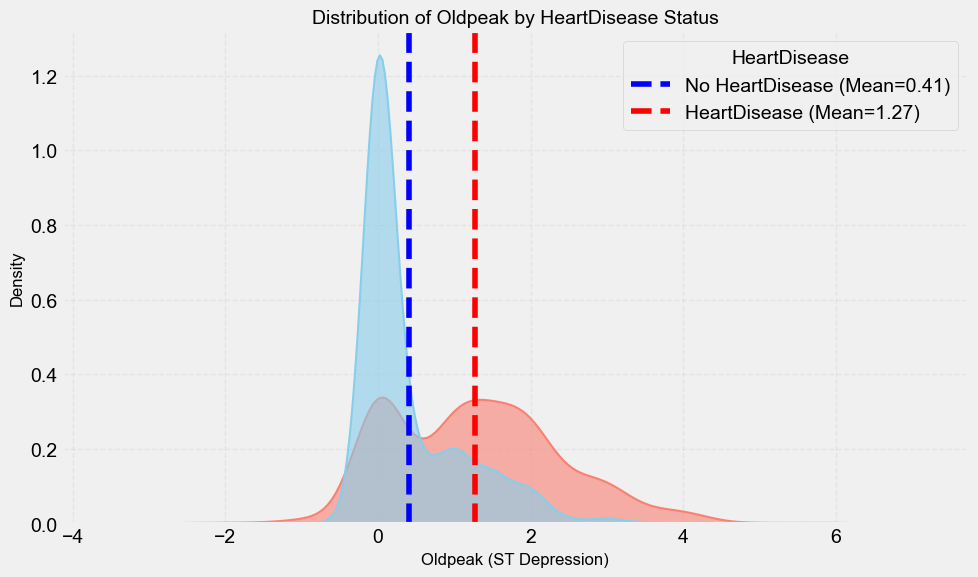

In [26]:
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=data, 
    x='Oldpeak', 
    hue='HeartDisease', 
    fill=True, 
    common_norm=False, 
    palette={0: "skyblue", 1: "salmon"},
    alpha=0.6,
    linewidth=1.5
)

mean_oldpeak_0 = data[data['HeartDisease'] == 0]['Oldpeak'].mean()
mean_oldpeak_1 = data[data['HeartDisease'] == 1]['Oldpeak'].mean()

plt.axvline(mean_oldpeak_0, color='blue', linestyle='--', label=f'No HeartDisease (Mean={mean_oldpeak_0:.2f})')
plt.axvline(mean_oldpeak_1, color='red', linestyle='--', label=f'HeartDisease (Mean={mean_oldpeak_1:.2f})')

plt.title('Distribution of Oldpeak by HeartDisease Status', fontsize=14)
plt.xlabel('Oldpeak (ST Depression)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='HeartDisease', loc='upper right')

plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

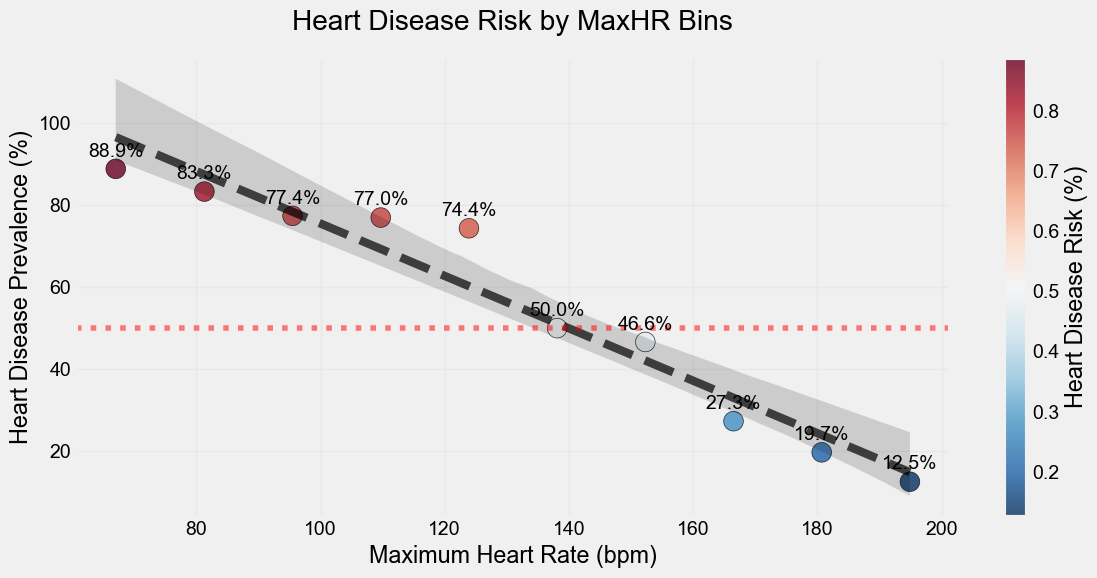

In [27]:
plt.figure(figsize=(12, 6))

data['MaxHR_bin'] = pd.cut(data['MaxHR'], bins=10)
bin_stats = data.groupby('MaxHR_bin')['HeartDisease'].mean().reset_index()
bin_stats['Midpoint'] = bin_stats['MaxHR_bin'].apply(lambda x: x.mid)
plt.scatter(
    x=bin_stats['Midpoint'],
    y=bin_stats['HeartDisease']*100, 
    s=200,  
    c=bin_stats['HeartDisease'],
    cmap='RdBu_r',
    edgecolor='black',
    alpha=0.8
)

sns.regplot(
    x=bin_stats['Midpoint'],
    y=bin_stats['HeartDisease']*100,
    scatter=False,
    color='black',
    line_kws={'linestyle':'--', 'alpha':0.7}
)

plt.axhline(y=50, color='red', linestyle=':', alpha=0.5)

plt.colorbar(label='Heart Disease Risk (%)')
plt.title('Heart Disease Risk by MaxHR Bins', pad=20)
plt.xlabel('Maximum Heart Rate (bpm)')
plt.ylabel('Heart Disease Prevalence (%)')
plt.grid(alpha=0.2)

for _, row in bin_stats.iterrows():
    plt.text(
        row['Midpoint'], row['HeartDisease']*100+3,
        f"{row['HeartDisease']*100:.1f}%",
        ha='center'
    )

plt.tight_layout()
plt.show()

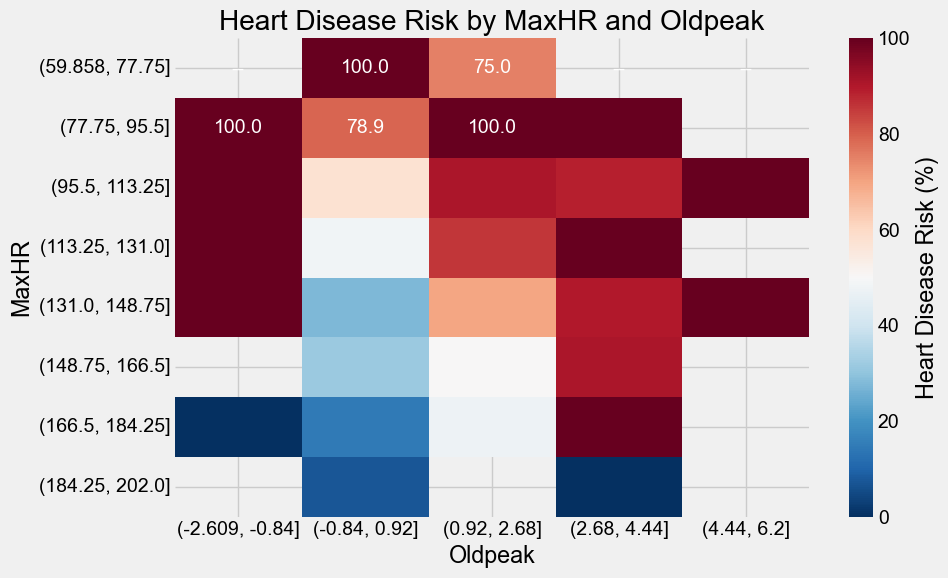

In [28]:
heatmap_data = data.groupby([
    pd.cut(data['MaxHR'], bins=8),
    pd.cut(data['Oldpeak'], bins=5)
])['HeartDisease'].mean().unstack()
  
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data*100,
    annot=True,
    fmt='.1f',
    cmap='RdBu_r',
    cbar_kws={'label': 'Heart Disease Risk (%)'}
)
plt.title('Heart Disease Risk by MaxHR and Oldpeak')
plt.tight_layout()
plt.show()

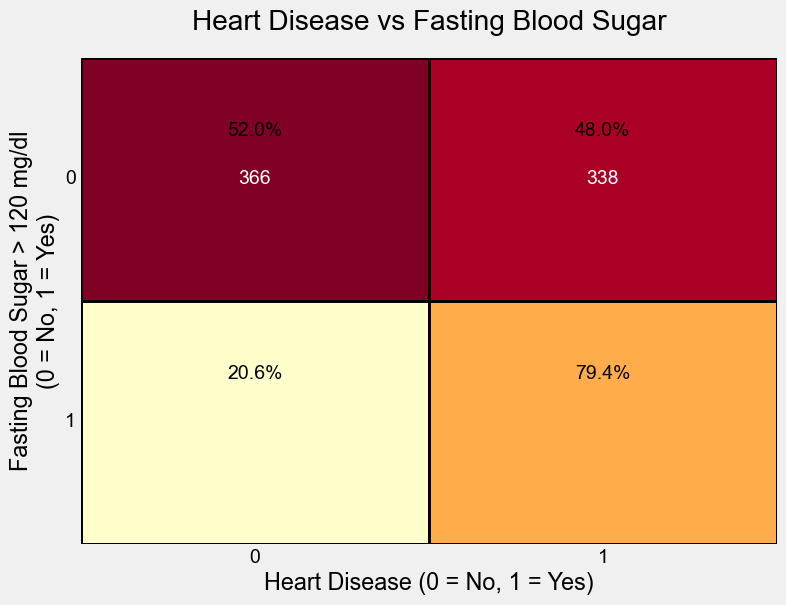

In [29]:
plt.figure(figsize=(8, 6))

cross_tab = pd.crosstab(data['FastingBS'], data['HeartDisease'])
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd', 
            cbar=False, linewidths=1, linecolor='black')

for i in range(len(cross_tab)):
    for j in range(len(cross_tab.columns)):
        plt.text(j+0.5, i+0.3, f"{percent_tab.iloc[i,j]:.1f}%", 
                ha='center', va='center', color='black')

plt.title('Heart Disease vs Fasting Blood Sugar', pad=20)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Fasting Blood Sugar > 120 mg/dl\n(0 = No, 1 = Yes)')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

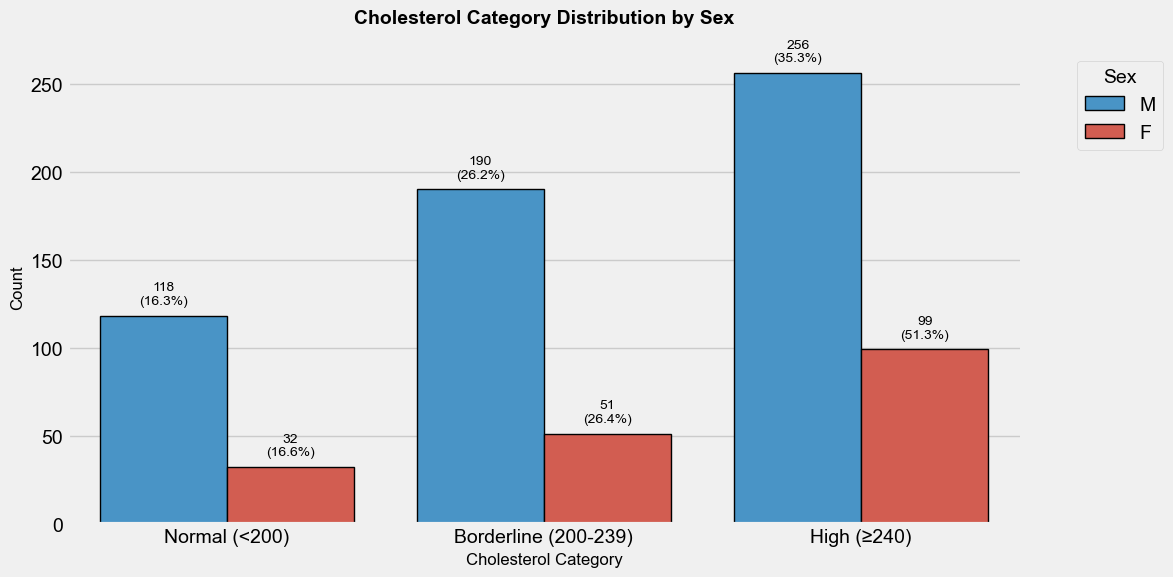

In [30]:

data['Cholesterol_Category'] = pd.cut(data['Cholesterol'],
                                    bins=[0, 200, 240, 1000],
                                    labels=['Normal (<200)', 'Borderline (200-239)', 'High (≥240)'])

plt.figure(figsize=(12, 6))

ax = sns.countplot(data=data,
                  x='Cholesterol_Category',
                  hue='Sex',
                  palette=['#3498db', '#e74c3c'], 
                  order=['Normal (<200)', 'Borderline (200-239)', 'High (≥240)'],
                  edgecolor='black',
                  linewidth=1)

total_by_sex = data['Sex'].value_counts()
sex_labels = ['M', 'F'] 
current_sex = 0

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        sex = sex_labels[current_sex]
        
        total = total_by_sex[sex]
        percent = 100 * height / total
        
        ax.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{int(height)}\n({percent:.1f}%)',
                ha='center', va='bottom',
                fontsize=10)
    current_sex = 1 - current_sex  

plt.title('Cholesterol Category Distribution by Sex', pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Cholesterol Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sex', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()

plt.tight_layout()
plt.show()

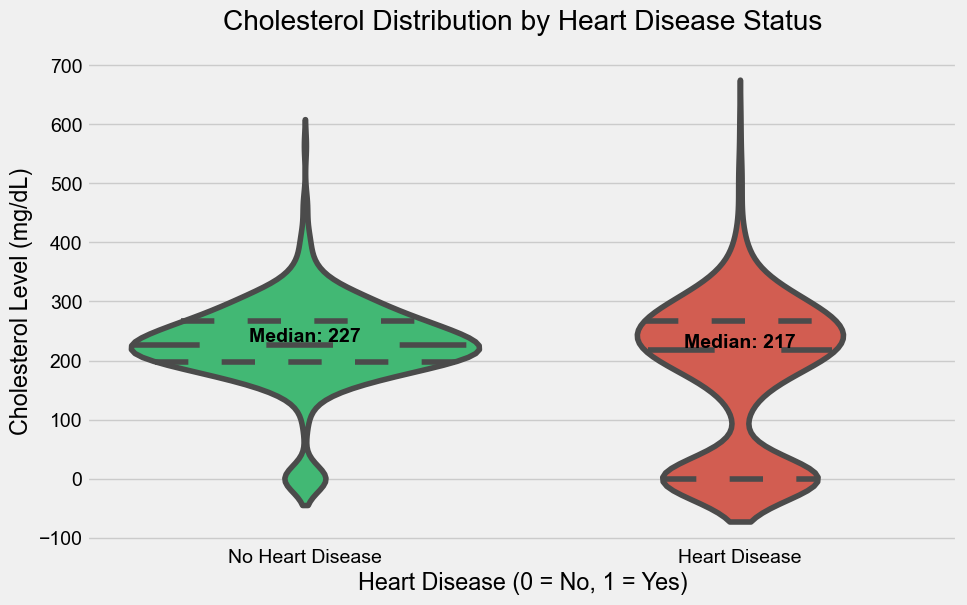

In [31]:

plt.figure(figsize=(10,6))

sns.violinplot(data=data, x='HeartDisease', y='Cholesterol', 
              split=True, inner='quartile', palette=['#2ecc71','#e74c3c'])

medians = data.groupby('HeartDisease')['Cholesterol'].median()
for i, m in enumerate(medians):
    plt.text(i, m+5, f'Median: {m:.0f}', ha='center', color='black', fontweight='bold')

plt.title('Cholesterol Distribution by Heart Disease Status', pad=20)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.show()

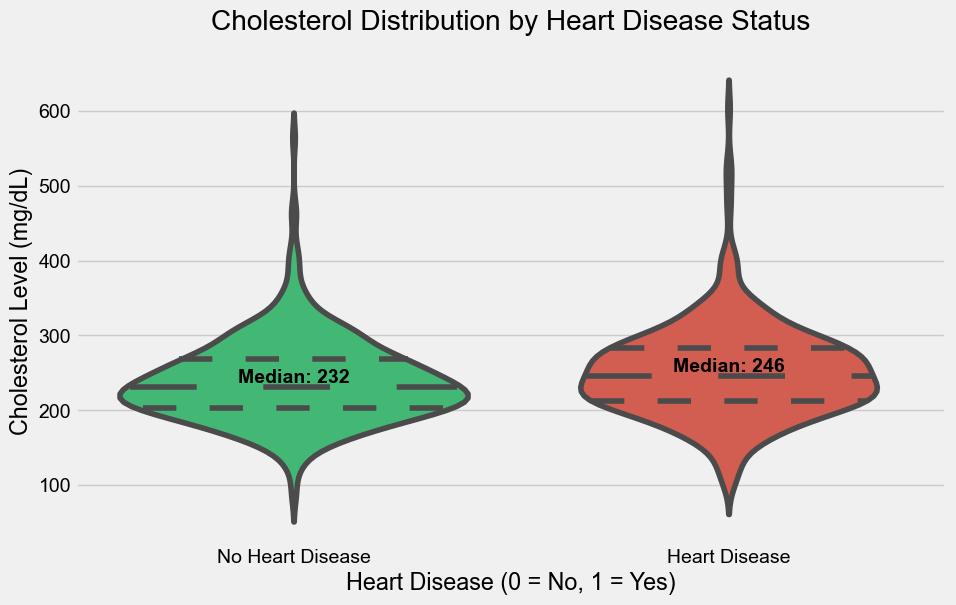

In [32]:
import numpy as np
data = data[data['Cholesterol'] > 0]
data['Cholesterol'] = data['Cholesterol'].replace(0, np.nan)
data['Cholesterol'] = data['Cholesterol'].fillna(data['Cholesterol'].median())

plt.figure(figsize=(10,6))

sns.violinplot(data=data, x='HeartDisease', y='Cholesterol', 
              split=True, inner='quartile', palette=['#2ecc71','#e74c3c'])

medians = data.groupby('HeartDisease')['Cholesterol'].median()
for i, m in enumerate(medians):
    plt.text(i, m+5, f'Median: {m:.0f}', ha='center', color='black', fontweight='bold')

plt.title('Cholesterol Distribution by Heart Disease Status', pad=20)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Cholesterol Level (mg/dL)')
plt.xticks([0,1], ['No Heart Disease', 'Heart Disease'])
plt.show()

In [33]:

bins = [0, 200, 240, 300, 1000]
data['chol_bin'] = pd.cut(data['Cholesterol'], bins=bins)
print(data.groupby('chol_bin')['HeartDisease'].mean())

chol_bin
(0, 200]       0.393333
(200, 240]     0.439834
(240, 300]     0.539683
(300, 1000]    0.533981
Name: HeartDisease, dtype: float64



Matrica e korrelacionit:
                   Age  RestingBP  Cholesterol     MaxHR   Oldpeak  \
Age           1.000000   0.259865     0.058758 -0.382112  0.286006   
RestingBP     0.259865   1.000000     0.095939 -0.125774  0.198575   
Cholesterol   0.058758   0.095939     1.000000 -0.019856  0.058488   
MaxHR        -0.382112  -0.125774    -0.019856  1.000000 -0.259533   
Oldpeak       0.286006   0.198575     0.058488 -0.259533  1.000000   
HeartDisease  0.298617   0.173242     0.103866 -0.377212  0.495696   

              HeartDisease  
Age               0.298617  
RestingBP         0.173242  
Cholesterol       0.103866  
MaxHR            -0.377212  
Oldpeak           0.495696  
HeartDisease      1.000000  


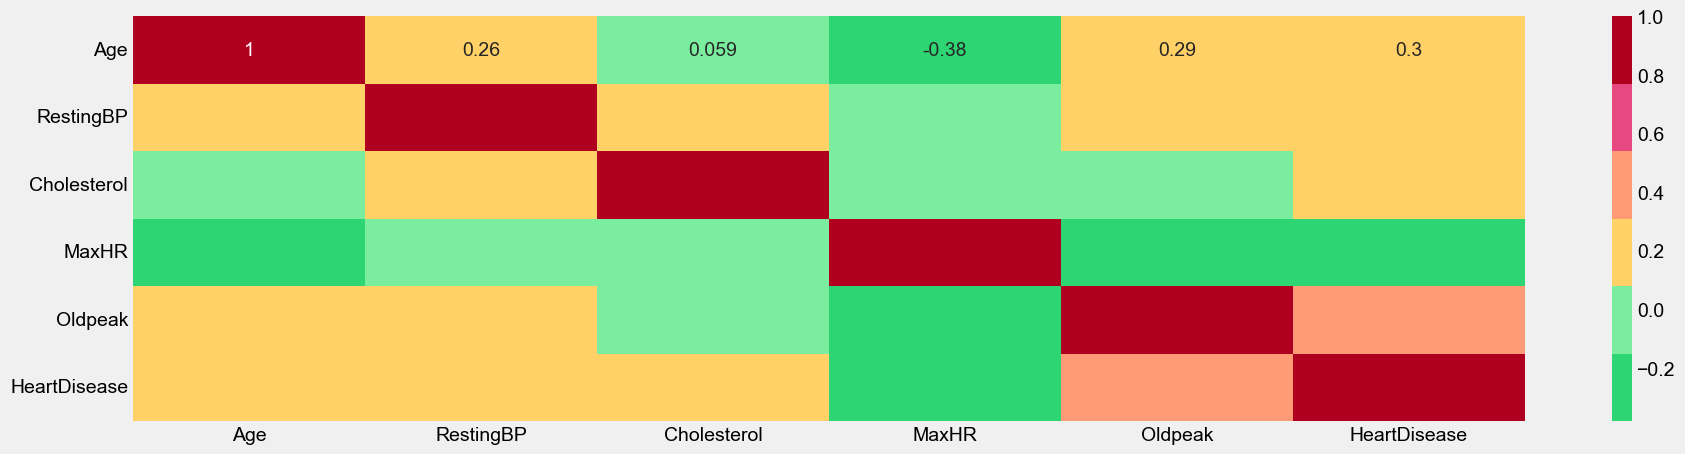

In [34]:
correlation = data[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',  'HeartDisease']].corr()
print("\nMatrica e korrelacionit:")
print(correlation)
plt.figure(figsize = (20,5))
sns.heatmap(correlation,cmap = colors,annot = True);

In [35]:
df_clean = data.copy()

df_clean['Sex'] = df_clean['Sex'].map({'M': 1, 'F': 0})
df_clean['ExerciseAngina'] = df_clean['ExerciseAngina'].map({'Y': 1, 'N': 0})

numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = ['ChestPainType', 'RestingECG', 'ST_Slope']

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [36]:
X = df_clean.drop('HeartDisease', axis=1)
y = df_clean['HeartDisease']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)



Modeli: Random Forest
Saktësia: 0.8400
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        78
           1       0.84      0.82      0.83        72

    accuracy                           0.84       150
   macro avg       0.84      0.84      0.84       150
weighted avg       0.84      0.84      0.84       150



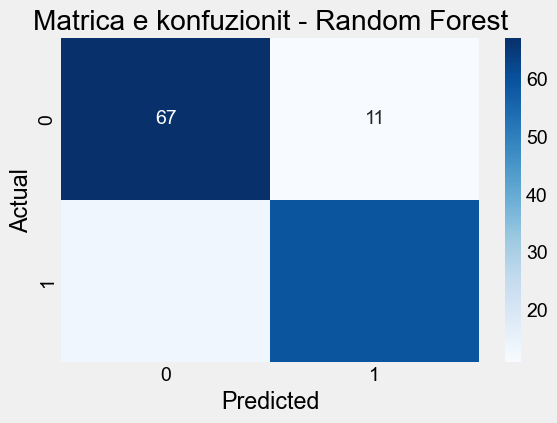

[[67 11]
 [13 59]]

Modeli: SVM
Saktësia: 0.8467
              precision    recall  f1-score   support

           0       0.84      0.87      0.86        78
           1       0.86      0.82      0.84        72

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



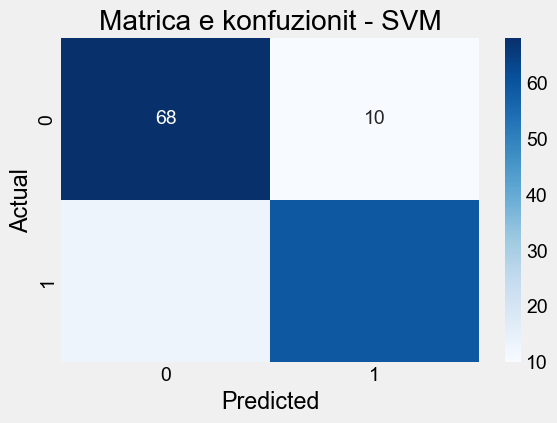

[[68 10]
 [13 59]]

Modeli: Logistic Regression
Saktësia: 0.8667
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        78
           1       0.87      0.85      0.86        72

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



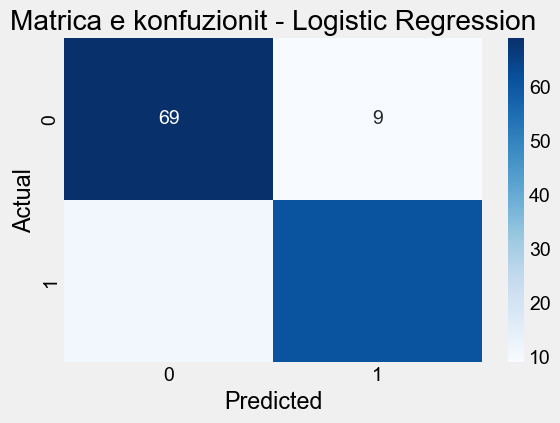

[[69  9]
 [11 61]]


In [49]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'SVM': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, random_state=42))
    ]),
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ])
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\nModeli: {name}")
    print(f"Saktësia: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matrica e konfuzionit - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print(cm)


In [ ]:
# from sklearn.linear_model import LogisticRegression

# pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(random_state=42, max_iter=1000))
# ])

# param_grid = {
#     'classifier__C': [0.1, 1, 10],  
#     'classifier__solver': ['liblinear', 'saga']
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# grid_search.fit(X_train, y_train)

# print("\nParametrat më të mirë:")
# print(grid_search.best_params_)
# print(f"Saktësia më e mirë: {grid_search.best_score_:.4f}")


Random forest shfaq performance me te mire pas optimizimit

In [53]:
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("\nParametrat më të mirë:")
print(grid_search.best_params_)
print(f"Saktësia më e mirë: {grid_search.best_score_:.4f}")



Parametrat më të mirë:
{'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Saktësia më e mirë: 0.8507


In [54]:
import joblib
final_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

final_model.fit(X_train, y_train)

joblib.dump(final_model, 'heart_disease_model.pkl')

print("Modeli u ruajt me sukses!")

Modeli u ruajt me sukses!


In [55]:
loaded_model = joblib.load('heart_disease_model.pkl')

new_patient = pd.DataFrame({
    'Age': [79],
    'Sex': [0],
    'ChestPainType': ['ASY'],
    'RestingBP': [140],
    'Cholesterol': [230],
    'FastingBS': [0],
    'RestingECG': ['Normal'],
    'MaxHR': [150],
    'ExerciseAngina': [1],
    'Oldpeak': [2.3],
    'ST_Slope': ['Up']
})

prediction = loaded_model.predict(new_patient)


if prediction[0] == 1:
    print("Parashikimi: Ka rrezik për sëmundje të zemrës.")
else:
    print("Parashikimi: Nuk ka rrezik për sëmundje të zemrës.")


Parashikimi: Ka rrezik për sëmundje të zemrës.
